In [2]:
from time import time
import datetime
from operator import itemgetter
import csv

import utils
import data_utils

import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation as cv
from sklearn.grid_search import RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [3]:
train, test = data_utils.load_transformed_data()
X_train, y_train = data_utils.get_raw_values(train)

data_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp['Date'] = dataframe.Date + oneday
data_utils.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp['SchoolHoliday_m1'] = dataframe.SchoolHoliday
data_utils.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp['Date'] = dataframe.Date - oneda

(0, 2)

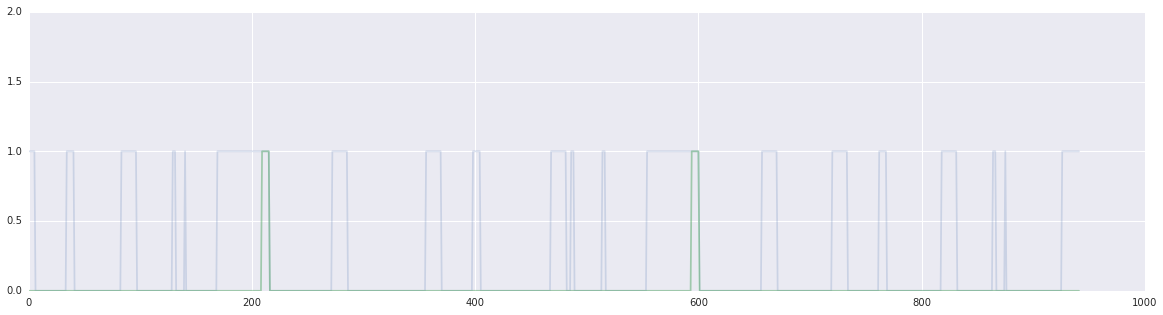

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(train[train.Store==599].SchoolHoliday[:], alpha=0.2)
plt.plot(train[train.Store==599].SchoolHolidayEnding[:], alpha=0.5)
#plt.plot(train[train.Store==600].Open[150:220], alpha=0.5)
#plt.plot(train[train.Store==600].month, alpha=0.5)
#plt.plot(test[test.Store==600].Sales, alpha=0.5)
plt.ylim((0,2))

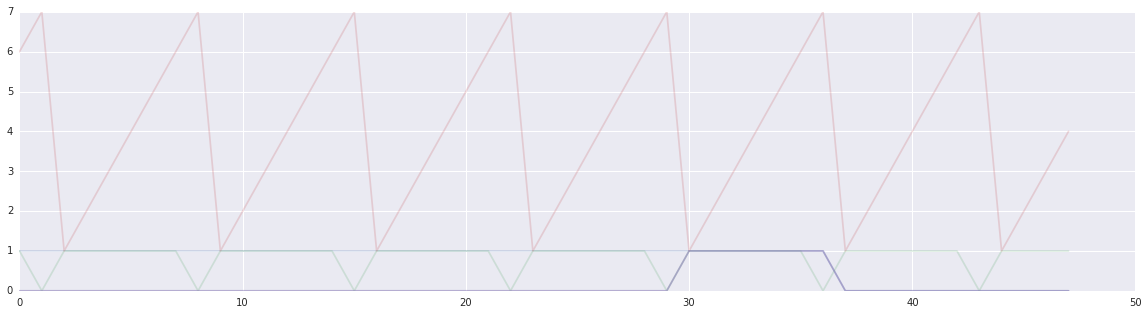

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(test[test.Store==601].SchoolHoliday, alpha=0.2)
plt.plot(test[test.Store==601].Open, alpha=0.2)
plt.plot(test[test.Store==601].DayOfWeek, alpha=0.2)
plt.plot(test[test.Store==601].SchoolHolidayEnding, alpha=0.5)
#plt.plot(test[test.Store==600].Sales, alpha=0.5)

In [ ]:
rfr_params = {'n_estimators': 100, 'random_state': 42, 'n_jobs': -1, 'oob_score': False, 'bootstrap': False, 'min_samples_leaf': 6, 'min_samples_split': 40, 'max_features': 13, 'max_depth': 54}
rfr_params = {'n_estimators': 100, 'random_state': 42, 'n_jobs': -1}

In [ ]:
model = RandomForestRegressor(**rfr_params)
folds = cv.KFold(n=len(y_train), n_folds=5, shuffle=True, random_state=42)
scores = cv.cross_val_score(model, X_train, y_train, scoring=utils.rmspe_scorer, cv=folds, n_jobs=-1)
print(scores)
print(scores.mean(), scores.std())

In [ ]:
rfr_params['n_estimators'] = 300
X_train, y_train = data_utils.get_raw_values(train)
X_test, y_test = data_utils.get_raw_values(test)
forest = RandomForestRegressor(**rfr_params)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
data_utils.write_submission(y_pred, test)

In [ ]:
imp = forest.feature_importances_
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.bar(range(len(imp)), imp)

In [ ]:
train.drop(['Sales', 'Date'], axis=1).dtypes